<a href="https://colab.research.google.com/github/arsalanmubeen/IBA/blob/main/Backpropagation_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def TrainingInstance(TraininginstanceSize):
 sizeX = TraininginstanceSize
 X1= np.random.normal(loc = 0.0, scale = 1.0, size = (sizeX , 4)) 
 import random
 df =pd.DataFrame(data=X1,columns=["X1", "X2" , "X3","X4"])

 randomlist = []
 for i in range(0,sizeX):
   n = random.randint(0,3)
   randomlist.append(n)
 df["Y"]  = randomlist
 return df

# Train-Test-Split

In [ ]:
def Train_Test_Split(df,Train_test_split_ratio):
 x = df.drop("Y", axis=1).values # input matrix 
 y = df.Y.values # Lable matrix 

 sizeX = Train_test_split_ratio # test split size 

 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=sizeX, random_state=0)

 y_train = y_train.reshape((-1,1))
 y_test = y_test.reshape((-1,1))
 return x_train, x_test, y_train, y_test

# Helper Functions

In [ ]:
#activation fuction 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
#lost fuction
def mean_squared_error(predictions, labels):
    N = labels.size 
    mse = ((predictions - labels)**2).sum() / (2*N)
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.round() == labels
    accuracy = predicions_correct.mean()
    return accuracy


# Weight Initialization

In [ ]:
def Weight_Initialization(n_input, n_hidden, n_output):
 np.random.seed(10)
 # im craeting two waight matrix 
 # pick the Random value from the normal distribution . SD = 0.5
 # Siza = Waight goes to the I/p layer to th Hidden layer
 weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   
 weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  
 return weights_1,weights_2

# Training the Neural Network

In [ ]:
def  Training_the_Neural_Network(y_train,x_train,weights_1,weights_2,epochs,activation_function,learning_rate):
 N = y_train.size
 monitoring = {"mean_squared_error": [], "accuracy": []}
 for epoch in range(epochs):

    
    # activation_function from two (sigmoid or tanh)
    if (activation_function == 0):
      # feedforward 
      hidden_layer = sigmoid(np.dot(x_train, weights_1))      
      output_layer = sigmoid(np.dot(hidden_layer, weights_2))   
    
      # monitor training process
      acc = accuracy(output_layer, y_train)
      mse = mean_squared_error(output_layer, y_train)
      monitoring["accuracy"].append(acc)
      monitoring["mean_squared_error"].append(mse)
  
      # backpropagation
      output_layer_delta = (output_layer - y_train) * output_layer * (1 - output_layer)                
      hidden_layer_delta = np.dot(output_layer_delta, weights_2.T) * hidden_layer * (1 - hidden_layer)  

      # weight updates
      weights_2 -= learning_rate * np.dot(hidden_layer.T, output_layer_delta) / N   
      weights_1 -= learning_rate * np.dot(x_train.T, hidden_layer_delta) / N        

    else:
      # feedforward
      hidden_layer = tanh(np.dot(x_train, weights_1))        
      output_layer = tanh(np.dot(hidden_layer, weights_2))   

      # monitor training process
      acc = accuracy(output_layer, y_train)
      mse = mean_squared_error(output_layer, y_train)
      monitoring["accuracy"].append(acc)
      monitoring["mean_squared_error"].append(mse)
  
      # backpropagation
      output_layer_delta = (output_layer - y_train) * output_layer * (1 - output_layer)                 
      hidden_layer_delta = np.dot(output_layer_delta, weights_2.T) * hidden_layer * (1 - hidden_layer) 

      # weight updates
      weights_2 -= learning_rate * np.dot(hidden_layer.T, output_layer_delta) / N  
      weights_1 -= learning_rate * np.dot(x_train.T, hidden_layer_delta) / N        #
    

 monitoring_df = pd.DataFrame(monitoring)
 return monitoring_df, weights_1, weights_2


In [ ]:
def  PlotMSEandACC(monitoring_df):
 fig, axes = plt.subplots(1, 2, figsize=(15,5))
 monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
 monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

In [ ]:
def  Test_Data(weights_1,weights_2,x_test,y_test):
 hidden_layer_inputs = np.dot(x_test, weights_1)
 hidden_layer_outputs = sigmoid(hidden_layer_inputs)

 output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
 output_layer_outputs = sigmoid(output_layer_inputs)

 acc = accuracy(output_layer_outputs, y_test)
 print("Accuracy of Test Data: {} \n".format(acc))


In [ ]:
def MainFun(TraininginstanceSize, Train_test_split_ratio , learning_rate ,neurons_in_the_input_layer,neurons_in_the_hidden_layer,neurons_in_the_output_layer,epochs,activation_function):
   DF = TrainingInstance(TraininginstanceSize)
   x_train, x_test, y_train, y_test = Train_Test_Split(DF,Train_test_split_ratio)
   weights_1,weights_2 = Weight_Initialization(neurons_in_the_input_layer, neurons_in_the_hidden_layer, neurons_in_the_output_layer)
   monitoring_df, weights_1, weights_2 = Training_the_Neural_Network(y_train,x_train,weights_1,weights_2,epochs,activation_function,learning_rate)
   PlotMSEandACC(monitoring_df)
   Test_Data(weights_1,weights_2,x_test,y_test)


Accuracy of Test Data: 0.254 



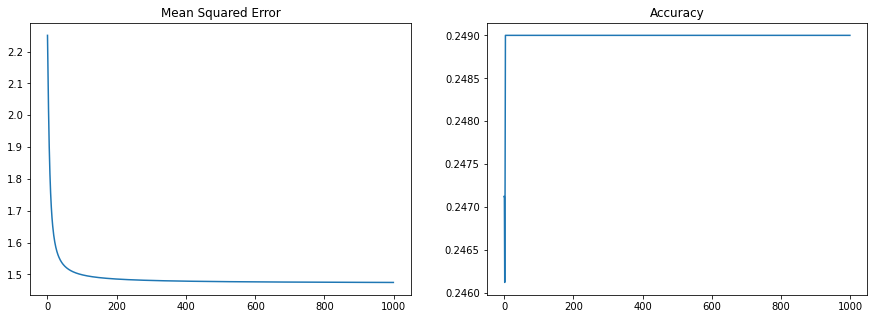

In [ ]:
MainFun(TraininginstanceSize=5000,
        Train_test_split_ratio = 0.2,
        learning_rate= 1,
        neurons_in_the_input_layer= 4,
        neurons_in_the_hidden_layer= 3,
        neurons_in_the_output_layer= 2,
        epochs= 1000, # Traning iteration 
        activation_function = 0) # (sigmoid = 0 or tanh = 1)